In [1]:
import glob
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from sklearn.decomposition import PCA, randomized_svd

In [2]:
def plot(X, x_dim=192, y_dim=168):
    """Just a little helper function to get a nice image plot"""
    m = 255 if X.max() > 1 else 1
    plt.imshow(X.reshape(x_dim, y_dim), cmap='gray', vmin=0, vmax=m)
    plt.axis('off')

We will use Yale face dataset.

In [3]:
# !curl http://vision.ucsd.edu/extyaleb/CroppedYaleBZip/CroppedYale.zip --output CroppedYale.zip
# !unzip CroppedYale.zip

In [4]:
# Read all images into array of shape (2414, 192, 168)
X = np.array([np.asarray(Image.open(path)) for path in glob.glob('CroppedYale/*/*E*.pgm')])
# Reshape to (32256, 2414), so that column spans single image
X = X.reshape(X.shape[0], -1)

Let's plot one face and it's reconstructions. We could use SVD or even better randomized SVD, but in sklearn it is easier to use PCA instead.

In [5]:
def plot_reconstructions(img, steps=[10, 20, 50, 100, 200, 500, 1000]):
    for r in steps:
        pca = PCA(r)
        pca.fit(X)
        plot(pca.inverse_transform(pca.transform(img[np.newaxis]))[0])
        plt.show()

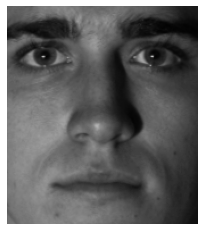

In [6]:
img = X[5]
plot(img)

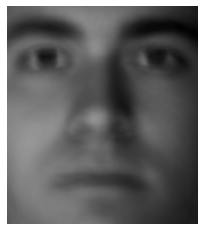

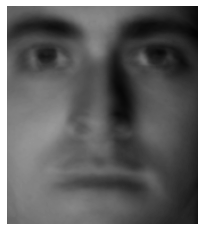

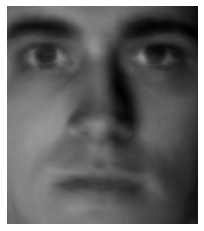

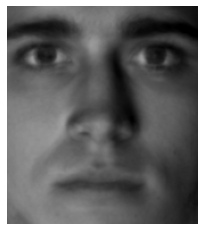

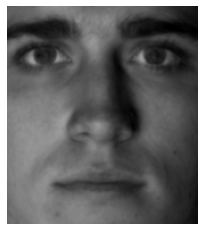

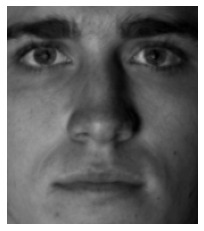

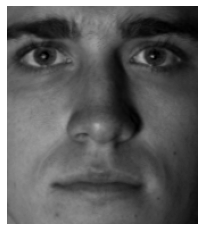

In [7]:
plot_reconstructions(img)

**Q:** What if we apply same eigenfaces for the non-face image?

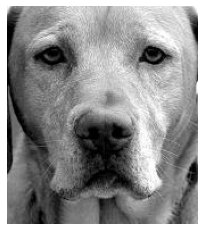

In [10]:
img = np.asarray(Image.open('img/dog_crop.jpg')).flatten()
plot(img)

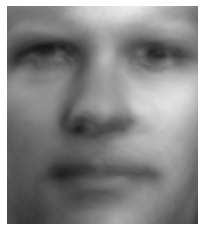

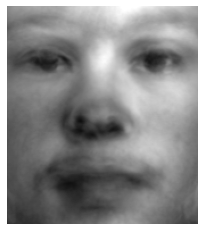

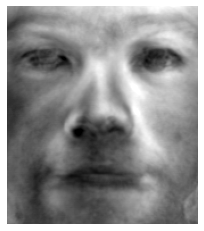

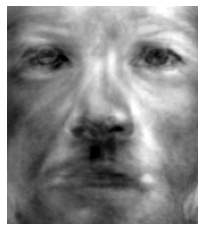

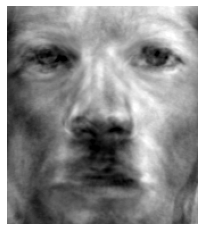

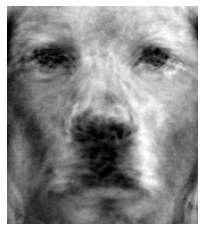

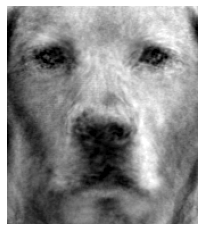

In [11]:
plot_reconstructions(img)

**Q:** What if image is even less similar to the human face?

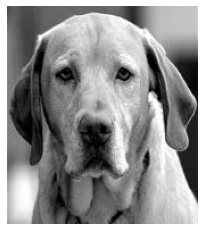

In [12]:
img = np.asarray(Image.open('img/dog_full.jpg')).flatten()
plot(img)

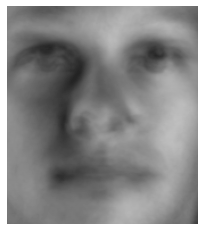

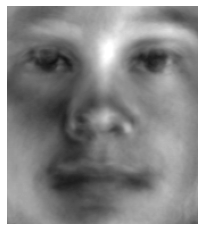

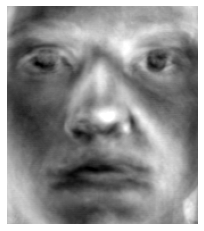

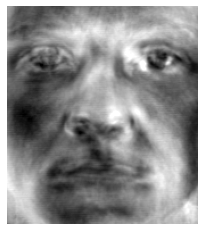

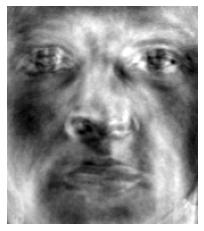

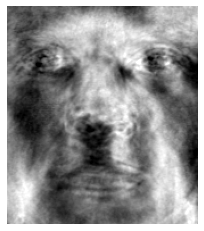

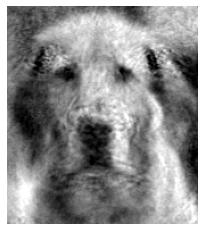

In [13]:
plot_reconstructions(img)

For more examples see:
- *Data-Driven Science and Engineering: Machine Learning, Dynamical Systems, and Control* by J. Nathan Kutz and Steven L. Brunton.
- Fast AI [Computational Linear Algebra course](https://www.fast.ai/2017/07/17/num-lin-alg/) contains [background removal example](https://nbviewer.org/github/fastai/numerical-linear-algebra/blob/master/nbs/3.%20Background%20Removal%20with%20Robust%20PCA.ipynb).